In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Se carga el archivo en el DataFrame df
df = pd.read_csv('frxst_pts_out.txt', sep=",", header=None)
df

,0,1,2,3,4,5,6,7
0,0,2023-03-01 06:00:00,378,-64.71899,********,-0.000,-0.000,******
1,0,2023-03-01 06:00:00,409,-64.64684,********,-0.000,-0.000,******
2,0,2023-03-01 06:00:00,142,-64.53544,********,-0.000,-0.000,******
3,3600,2023-03-01 07:00:00,378,-64.71899,********,1458.895,51520.398,3.468
4,3600,2023-03-01 07:00:00,409,-64.64684,********,1627.658,57480.191,4.233
...,...,...,...,...,...,...,...,...
70,82800,2023-03-02 05:00:00,409,-64.64684,********,54.843,1936.769,1.104
71,82800,2023-03-02 05:00:00,142,-64.53544,********,0.000,0.000,0.000
72,86400,2023-03-02 06:00:00,378,-64.71899,********,28.029,989.818,0.702
73,86400,2023-03-02 06:00:00,409,-64.64684,********,51.126,1805.505,1.073


In [41]:
q1_obs = pd.read_excel('caudal_obs_1.xlsx')
q1_obs

,Fecha,Caudal
0,2023-03-28 00:00:00,2.686859
1,2023-03-28 00:10:00,2.686859
2,2023-03-28 00:20:00,2.686859
3,2023-03-28 00:30:00,2.686859
4,2023-03-28 00:40:00,2.686859
...,...,...
571,2023-03-31 23:10:00,15.575852
572,2023-03-31 23:20:00,15.575852
573,2023-03-31 23:30:00,15.014508
574,2023-03-31 23:40:00,15.575852


In [42]:
q1_obs['Fecha'] =  pd.to_datetime(q1_obs['Fecha'], format='%Y-%m-%d %H:%M:%S')
q1_obs

,Fecha,Caudal
0,2023-03-28 00:00:00,2.686859
1,2023-03-28 00:10:00,2.686859
2,2023-03-28 00:20:00,2.686859
3,2023-03-28 00:30:00,2.686859
4,2023-03-28 00:40:00,2.686859
...,...,...
571,2023-03-31 23:10:00,15.575852
572,2023-03-31 23:20:00,15.575852
573,2023-03-31 23:30:00,15.014508
574,2023-03-31 23:40:00,15.575852


In [43]:
q1_obs.set_index('Fecha', inplace=True)
q1_obs

,Caudal
Fecha,
2023-03-28 00:00:00,2.686859
2023-03-28 00:10:00,2.686859
2023-03-28 00:20:00,2.686859
2023-03-28 00:30:00,2.686859
2023-03-28 00:40:00,2.686859
...,...
2023-03-31 23:10:00,15.575852
2023-03-31 23:20:00,15.575852
2023-03-31 23:30:00,15.014508


In [44]:
# Se renombran las columnas
df = df.rename(columns={0: "seg", 1: "Fecha", 2:'id', 3:'Lon', 4:'Lat',
                  5:'caudal[m3/s]', 6:'caudal[ft3/s]', 7:'nivel'})

df

,seg,Fecha,id,Lon,Lat,caudal[m3/s],caudal[ft3/s],nivel
Fecha,,,,,,,,
2023-03-01 00:00:00,0,2023-03-01 00:00:00,378,-64.71899,********,-0.000,-0.000,******
2023-03-01 00:00:00,0,2023-03-01 00:00:00,409,-64.64684,********,-0.000,-0.000,******
2023-03-01 00:00:00,0,2023-03-01 00:00:00,142,-64.53544,********,-0.000,-0.000,******
2023-03-01 01:00:00,3600,2023-03-01 01:00:00,378,-64.71899,********,1458.895,51520.398,3.468
2023-03-01 01:00:00,3600,2023-03-01 01:00:00,409,-64.64684,********,1627.658,57480.191,4.233
...,...,...,...,...,...,...,...,...
2023-03-01 23:00:00,82800,2023-03-01 23:00:00,409,-64.64684,********,54.843,1936.769,1.104
2023-03-01 23:00:00,82800,2023-03-01 23:00:00,142,-64.53544,********,0.000,0.000,0.000
2023-03-02 00:00:00,86400,2023-03-02 00:00:00,378,-64.71899,********,28.029,989.818,0.702


In [45]:
# Se transforma la columna fecha de str a objeto datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%Y-%m-%d %H:%M:%S')

df['Fecha'] = df['Fecha'] - pd.Timedelta(hours=3)
# Se setea el indice con la columna fecha
df.index = df['Fecha']
df

,seg,Fecha,id,Lon,Lat,caudal[m3/s],caudal[ft3/s],nivel
Fecha,,,,,,,,
2023-02-28 21:00:00,0,2023-02-28 21:00:00,378,-64.71899,********,-0.000,-0.000,******
2023-02-28 21:00:00,0,2023-02-28 21:00:00,409,-64.64684,********,-0.000,-0.000,******
2023-02-28 21:00:00,0,2023-02-28 21:00:00,142,-64.53544,********,-0.000,-0.000,******
2023-02-28 22:00:00,3600,2023-02-28 22:00:00,378,-64.71899,********,1458.895,51520.398,3.468
2023-02-28 22:00:00,3600,2023-02-28 22:00:00,409,-64.64684,********,1627.658,57480.191,4.233
...,...,...,...,...,...,...,...,...
2023-03-01 20:00:00,82800,2023-03-01 20:00:00,409,-64.64684,********,54.843,1936.769,1.104
2023-03-01 20:00:00,82800,2023-03-01 20:00:00,142,-64.53544,********,0.000,0.000,0.000
2023-03-01 21:00:00,86400,2023-03-01 21:00:00,378,-64.71899,********,28.029,989.818,0.702


In [46]:
df['id'].unique()

array([378, 409, 142])

In [47]:
df_id1 = df.loc[df['id'] == df['id'].iloc[0]]
df_id1

,seg,Fecha,id,Lon,Lat,caudal[m3/s],caudal[ft3/s],nivel
Fecha,,,,,,,,
2023-02-28 21:00:00,0,2023-02-28 21:00:00,378,-64.71899,********,-0.000,-0.000,******
2023-02-28 22:00:00,3600,2023-02-28 22:00:00,378,-64.71899,********,1458.895,51520.398,3.468
2023-02-28 23:00:00,7200,2023-02-28 23:00:00,378,-64.71899,********,819.461,28938.979,2.771
2023-03-01 00:00:00,10800,2023-03-01 00:00:00,378,-64.71899,********,568.544,20077.926,2.401
2023-03-01 01:00:00,14400,2023-03-01 01:00:00,378,-64.71899,********,441.771,15600.991,2.173
2023-03-01 02:00:00,18000,2023-03-01 02:00:00,378,-64.71899,********,357.747,12633.718,1.999
2023-03-01 03:00:00,21600,2023-03-01 03:00:00,378,-64.71899,********,298.518,10542.068,1.860
2023-03-01 04:00:00,25200,2023-03-01 04:00:00,378,-64.71899,********,251.346,8876.217,1.737
2023-03-01 05:00:00,28800,2023-03-01 05:00:00,378,-64.71899,********,210.013,7416.533,1.616


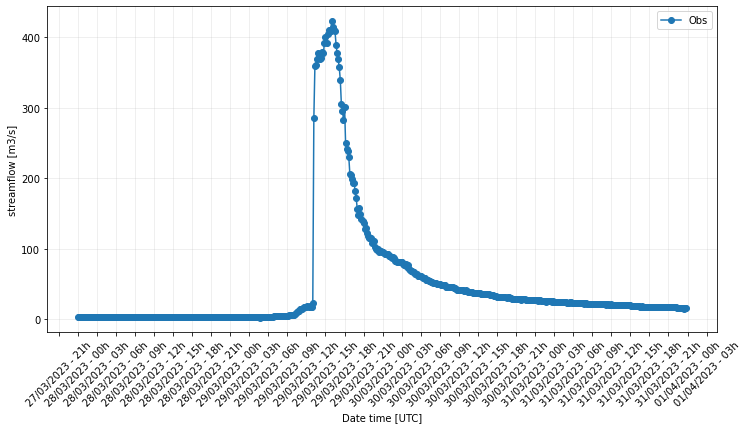

In [55]:
fig_width = 12
fig_height = 6

xtick_fontsize = 10
ytick_fontsize = 10
xy_label_fontsize = 10
rotation = 45
hour_interval = 3

#########################################################################
fig = plt.figure(figsize=[fig_width,fig_height])

ax = fig.add_subplot(111)
myFmt = mdates.DateFormatter('%d/%m/%Y - %Hh')

# ax.plot(df_id1.index, 
#         df_id1['caudal[m3/s]'],
#         label='Sim', marker='o')

ax.plot(q1_obs.index, 
        q1_obs['Caudal'],
        label='Obs', marker='o')

ax.set_ylabel('streamflow [m3/s]', fontsize=xy_label_fontsize)
ax.set_xlabel('Date time [UTC]', fontsize=xy_label_fontsize)

ax.grid(alpha=.25)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = hour_interval))

plt.xticks(fontsize=xtick_fontsize,rotation=rotation)
plt.yticks(fontsize=xtick_fontsize)

plt.legend()
plt.show()

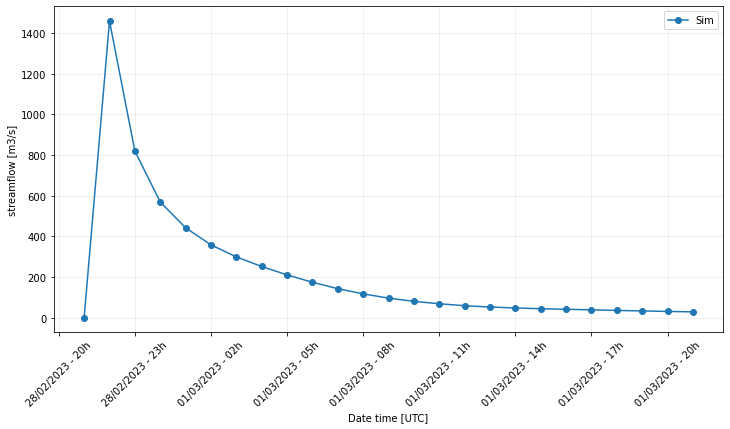

In [56]:
fig_width = 12
fig_height = 6

xtick_fontsize = 10
ytick_fontsize = 10
xy_label_fontsize = 10
rotation = 45
hour_interval = 3

#########################################################################
fig = plt.figure(figsize=[fig_width,fig_height])

ax = fig.add_subplot(111)
myFmt = mdates.DateFormatter('%d/%m/%Y - %Hh')

ax.plot(df_id1.index, 
        df_id1['caudal[m3/s]'],
        label='Sim', marker='o')

# ax.plot(q1_obs.index, 
#         q1_obs['Caudal'],
#         label='Obs', marker='o')

ax.set_ylabel('streamflow [m3/s]', fontsize=xy_label_fontsize)
ax.set_xlabel('Date time [UTC]', fontsize=xy_label_fontsize)

ax.grid(alpha=.25)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = hour_interval))

plt.xticks(fontsize=xtick_fontsize,rotation=rotation)
plt.yticks(fontsize=xtick_fontsize)

plt.legend()
plt.show()

In [52]:
q1_obs

,Caudal
Fecha,
2023-03-28 00:00:00,2.686859
2023-03-28 00:10:00,2.686859
2023-03-28 00:20:00,2.686859
2023-03-28 00:30:00,2.686859
2023-03-28 00:40:00,2.686859
...,...
2023-03-31 23:10:00,15.575852
2023-03-31 23:20:00,15.575852
2023-03-31 23:30:00,15.014508


In [53]:
df_id1

,seg,Fecha,id,Lon,Lat,caudal[m3/s],caudal[ft3/s],nivel
Fecha,,,,,,,,
2023-02-28 21:00:00,0,2023-02-28 21:00:00,378,-64.71899,********,-0.000,-0.000,******
2023-02-28 22:00:00,3600,2023-02-28 22:00:00,378,-64.71899,********,1458.895,51520.398,3.468
2023-02-28 23:00:00,7200,2023-02-28 23:00:00,378,-64.71899,********,819.461,28938.979,2.771
2023-03-01 00:00:00,10800,2023-03-01 00:00:00,378,-64.71899,********,568.544,20077.926,2.401
2023-03-01 01:00:00,14400,2023-03-01 01:00:00,378,-64.71899,********,441.771,15600.991,2.173
2023-03-01 02:00:00,18000,2023-03-01 02:00:00,378,-64.71899,********,357.747,12633.718,1.999
2023-03-01 03:00:00,21600,2023-03-01 03:00:00,378,-64.71899,********,298.518,10542.068,1.860
2023-03-01 04:00:00,25200,2023-03-01 04:00:00,378,-64.71899,********,251.346,8876.217,1.737
2023-03-01 05:00:00,28800,2023-03-01 05:00:00,378,-64.71899,********,210.013,7416.533,1.616
